In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def prior(alfa,alfa_min=-5,alfa_max=5):
    return 1*(alfa>=alfa_min)*(alfa<=alfa_max)

def verosimilitud(x,alfa,beta=1):
    const = beta/np.pi
    den = beta**2+(x-alfa)**2
    return const/den

In [26]:
alfa = np.linspace(-6,6,10000)
#x = np.linspace(0,1,4)
x = stats.cauchy.rvs(loc=1,scale=1,size=200)
#x = 3*np.ones(10000)

log_V = np.zeros(len(alfa))
for x_i in x:
    log_V+=np.log(verosimilitud(x_i,alfa))

log_pos = np.log(prior(alfa))+log_V
log_evidencia = np.amax(log_pos)
log_pos = log_pos-log_evidencia
posterior = np.exp(log_pos)
posterior = posterior/np.trapz(posterior,alfa)

media = np.mean(x)
cero = np.argmax(posterior)
mu = alfa[cero]
d2 = (log_pos[cero+1] - 2*log_pos[cero] + log_pos[cero-1]) / ((alfa[1]-alfa[0])**2)
sigma = (-d2)**(-1/2)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Distribución de valores generados')

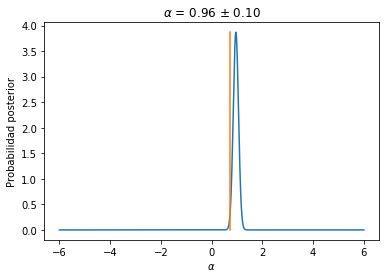

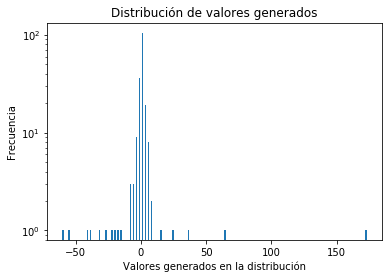

In [27]:
plt.figure()
plt.plot(alfa,posterior)
plt.plot(np.ones(100)*media,np.linspace(0,posterior[cero],100))
plt.xlabel(r'$\alpha$'.format())
plt.ylabel('Probabilidad posterior')
plt.title(r'$\alpha$ = {:.2f} $\pm$ {:.2f}'.format(mu,sigma))

plt.figure()
plt.hist(x,rwidth=0.5,bins=100)
plt.yscale('log')
plt.xlabel('Valores generados en la distribución')
plt.ylabel('Frecuencia')
plt.title('Distribución de valores generados')